In [154]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
Hello = tf.constant("Herro")

In [156]:
World = tf.constant("World")

In [157]:
with tf.Session() as sess:
    result = sess.run(Hello + World)

In [158]:
result

b'HerroWorld'

In [159]:
a = tf.constant(1)

In [160]:
b = tf.constant(2
            )

In [161]:
a + b


<tf.Tensor 'add_28:0' shape=() dtype=int32>

In [162]:
a + b

<tf.Tensor 'add_29:0' shape=() dtype=int32>

In [163]:
with tf.Session() as sess:
    result = sess.run(a + b)

In [164]:
result

3

In [165]:
#random normal distribution
distRand = tf.random_normal((4,4), mean = 0, stddev = 1000)

In [166]:
#random uniform distribution
distUni = tf.random_uniform((4,4), minval=-100, maxval=100)

In [167]:
#Graphs
node1 = tf.constant(10)
node2 = tf.constant(10)
node3 = node1 + node2

In [168]:
with tf.Session() as sess:
    result = sess.run(node3)

In [169]:
result

20

In [170]:
#Placeholders and Variables-

In [171]:
tensor = tf.random_normal((4,4), 0, 1)

In [172]:
variable = tf.Variable(initial_value=tensor)

In [173]:
sess = tf.InteractiveSession()

In [174]:
init = tf.global_variables_initializer()
sess.run(init)
sess.run(variable
        )

array([[ 0.1564678 , -0.35625732, -0.55070233, -0.30638412],
       [ 0.2558372 ,  0.06257327,  0.92029196,  0.21946768],
       [-1.03730357,  0.73813617,  0.71578401, -0.18493387],
       [-0.04899082, -1.89521825, -1.57242024,  0.40804851]], dtype=float32)

In [175]:
#simple quick classification NN

In [176]:
np.random.seed(101)

In [177]:
tf.set_random_seed(101)

In [178]:
#Gurt out some random data points
random_points = np.random.uniform(0, 100, (5,5))

In [179]:
random_points_2 = np.random.uniform(0, 100, (5,1))

In [180]:
random_points

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [181]:
random_points_2


array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [182]:
a = tf.placeholder(tf.float32)

In [183]:
b = tf.placeholder(tf.float32
                  )

In [184]:
add = a + b

In [185]:
mult_cult = tf.matmul(a, b)

In [186]:
with tf.Session() as sess:
    result = sess.run(add, feed_dict={a: random_points, b: random_points_2})
    print(result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


In [187]:
n1_features = 10
#3 layers of dense neurons
n1_neurons = 3

In [188]:
x = tf.placeholder(tf.float32, (None, n1_features))

In [189]:
W = tf.Variable(tf.random_normal([n1_features, n1_neurons]))

In [190]:
b = tf.Variable(tf.ones(n1_neurons))

In [191]:
xW = tf.matmul(x, W)

In [192]:
z = tf.add(xW , b)

In [193]:
#activation function yeet
a = tf.sigmoid(z)

In [194]:
init = tf.global_variables_initializer()

In [195]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    
    result = ur_mom.run(a, feed_dict={x: np.random.random([2, n1_features])})

In [196]:
result

array([[ 0.27860016,  0.15216359,  0.35658377],
       [ 0.50727379,  0.32034242,  0.36764559]], dtype=float32)

In [197]:
#regression lmao

In [198]:
noise_1 = np.random.uniform(-1.5, 1.5, 10)

In [199]:
x_data = np.linspace(0,10,10) + noise_1

In [200]:
noise_2 = np.random.uniform(-1.5, 1.5, 10)

In [201]:
y_complements = np.linspace(0,10,10) + noise_2

In [202]:
#plot data

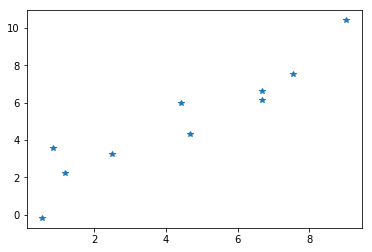

In [203]:
plt.plot(x_data, y_complements, "*")

In [204]:
#because np.random.rand() returns an array the [0] is nescesary
b = tf.Variable(np.random.rand(1)[0])
m = tf.Variable(np.random.rand(1)[0])

In [205]:
error = 0

for x,y in zip(x_data, y_complements):
    y_hat = (m*x) + b
    #want to minimize this
    error += (y - y_hat)**2

In [206]:
peepee = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = peepee.minimize(error)

In [207]:
init = tf.global_variables_initializer()

In [208]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    training_steps = 1000
    for i in range(training_steps):
        ur_mom.run(train)
    final_slope, final_intercept = ur_mom.run([m,b])

In [209]:
x_pred_graph = np.linspace(-1, 11, 10)
y_pred_plot = final_slope * x_pred_graph + final_intercept

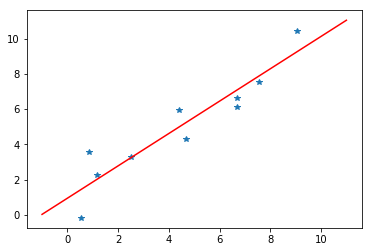

In [210]:
plt.plot(x_data, y_complements, "*")
plt.plot(x_pred_graph, y_pred_plot, "r")

In [211]:
#Boggers more regression
#massive dataset haha ues
x_2_data = np.linspace(0,10,100000)

In [212]:
noise_2 = np.random.uniform(-2, 2, len(x_2_data))

In [213]:
y_2_data = (0.76) * x_2_data + 5 + noise_2

In [214]:
x_1_df = pd.DataFrame(data = x_2_data, columns=['X DATA'])

In [215]:
y_1_df = pd.DataFrame(data = y_2_data, columns = ['TRUE Y VALUES'])

In [216]:
my_data_2 = pd.concat([x_1_df, y_1_df], axis=1)

In [217]:
my_data_2.head()

,X DATA,TRUE Y VALUES
0,0.0000,5.607071
1,0.0001,4.698352
2,0.0002,5.626533
3,0.0003,3.836874
4,0.0004,5.640002


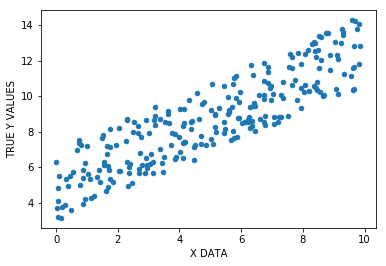

In [218]:
my_data_2.sample(250).plot(x = 'X DATA', y = 'TRUE Y VALUES', kind = 'scatter')

In [219]:
batch_size_A = 8

In [220]:
np.random.randn(2)

array([-0.61066939,  0.25343875])

In [221]:
m = tf.Variable(-0.61066939)
b = tf.Variable(0.25343875)

In [222]:
yph = tf.placeholder(tf.float32, [batch_size_A])

In [223]:
xph = tf.placeholder(tf.float32, [batch_size_A])

In [224]:
y_model_A = m*xph + b
error_A = tf.reduce_sum(tf.square(yph - y_model_A))

In [225]:
optimizer_A = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_A = optimizer_A.minimize(error_A)

In [226]:
init = tf.global_variables_initializer()

In [227]:
with tf.Session() as sess_kai:
    sess_kai.run(init)
    batches_A = 1000
    for i in range(batches_A):
        rand_ind_A = np.random.randint(len(x_2_data), size = batch_size_A)
        feed_A = {xph : x_2_data[rand_ind_A], yph : y_2_data[rand_ind_A]}
        sess_kai.run(train_A, feed_dict=feed_A)
    mod_m , mod_b = sess_kai.run([m,b])  

In [228]:
mod_m

0.83848977

In [229]:
mod_b

5.0076723

In [230]:
y_hat_A = mod_m*x_2_data + mod_b

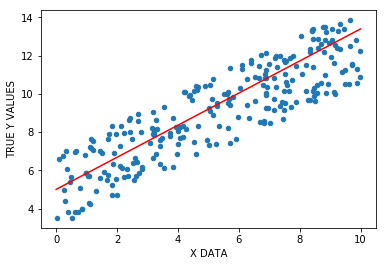

In [231]:
my_data_2.sample(250).plot(x = 'X DATA', y = 'TRUE Y VALUES', kind = 'scatter')
plt.plot(x_2_data, y_hat_A, 'r')

In [232]:
#Estimator API

In [233]:
#Define a list of feature columns
#Create the estimator model
#Create a data input function
#Train, Evaluate, Predict

In [234]:
feat_cols_A = [tf.feature_column.numeric_column('x', shape=[1],  )]

In [235]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols_A)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [236]:
from sklearn.model_selection import train_test_split

In [237]:
x_train_A, x_eval_A, y_train_A, y_eval_A = train_test_split(x_2_data, y_2_data, test_size= 0.3, random_state=101)

In [238]:
x_train_A.shape

(70000,)

In [239]:
x_eval_A.shape

(30000,)

In [240]:
inputs_func_A = tf.estimator.inputs.numpy_input_fn({'x': x_train_A}, y_train_A, batch_size = 8, num_epochs= None, shuffle = True)

In [241]:
train_func_A = tf.estimator.inputs.numpy_input_fn({'x': x_train_A}, y_train_A, batch_size = 8, num_epochs= 1000, shuffle = False)

In [242]:
test_func_A = tf.estimator.inputs.numpy_input_fn({'x': x_eval_A}, y_eval_A, batch_size = 8, num_epochs= None, shuffle = True)

In [243]:
estimator.train(input_fn= inputs_func_A, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj/model.ckpt.
INFO:tensorflow:loss = 485.607, step = 1
INFO:tensorflow:global_step/sec: 315.758
INFO:tensorflow:loss = 23.3569, step = 101 (0.318 sec)
INFO:tensorflow:global_step/sec: 473.812
INFO:tensorflow:loss = 44.7079, step = 201 (0.211 sec)
INFO:tensorflow:global_step/sec: 465.784
INFO:tensorflow:loss = 29.3748, step = 301 (0.216 sec)
INFO:tensorflow:global_step/sec: 551.265
INFO:tensorflow:loss = 13.3148, step = 401 (0.180 sec)
INFO:tensorflow:global_step/sec: 620.105
INFO:tensorflow:loss = 23.6305, step = 501 (0.161 sec)
INFO:tensorflow:global_step/sec: 575.881
INFO:tensorflow:loss = 11.4143, step = 601 (0.173 sec)
INFO:tensorflow:global_step/sec: 655.982
INFO:tensorflow:loss = 16.9219, step = 701 (0.152 sec)
INFO:tensorflow:global_step/sec: 628.607
INFO:tensorflow:loss = 6.82269, step = 801 (0.161 sec)
INFO:tensorflow:global_step/

In [244]:
train_metrics_A = estimator.evaluate(input_fn=train_func_A, steps=1000)

INFO:tensorflow:Starting evaluation at 2019-01-12-03:44:05
INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [245]:
test_matrics_A = estimator.evaluate(input_fn= test_func_A, steps=1000)

INFO:tensorflow:Starting evaluation at 2019-01-12-03:44:12
INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [265]:
print(train_metrics_A)

{'average_loss': 1.4517012, 'loss': 11.613609, 'global_step': 1000}


In [266]:
print(test_matrics_A)

{'average_loss': 1.454452, 'loss': 11.635616, 'global_step': 1000}


In [267]:
_data_A = np.linspace(0, 10, 10)
input_fn_predictor = tf.estimator.inputs.numpy_input_fn({'x': _data_A}, shuffle = False) 

In [275]:
yeet_A = estimator.predict(input_fn=input_fn_predictor)

In [276]:
list(yeet_A)

INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj/model.ckpt-1000


[{'predictions': array([ 4.33777857], dtype=float32)},
 {'predictions': array([ 5.32024288], dtype=float32)},
 {'predictions': array([ 6.30270767], dtype=float32)},
 {'predictions': array([ 7.28517151], dtype=float32)},
 {'predictions': array([ 8.2676363], dtype=float32)},
 {'predictions': array([ 9.25010109], dtype=float32)},
 {'predictions': array([ 10.23256493], dtype=float32)},
 {'predictions': array([ 11.21502876], dtype=float32)},
 {'predictions': array([ 12.19749451], dtype=float32)},
 {'predictions': array([ 13.17995834], dtype=float32)}]

In [273]:
predictions_A=[]

for p in yeet_A:
    predictions_A.append(p['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmplrpwa9yj/model.ckpt-1000


In [274]:
predictions_A

[array([ 4.33777857], dtype=float32),
 array([ 5.32024288], dtype=float32),
 array([ 6.30270767], dtype=float32),
 array([ 7.28517151], dtype=float32),
 array([ 8.2676363], dtype=float32),
 array([ 9.25010109], dtype=float32),
 array([ 10.23256493], dtype=float32),
 array([ 11.21502876], dtype=float32),
 array([ 12.19749451], dtype=float32),
 array([ 13.17995834], dtype=float32)]

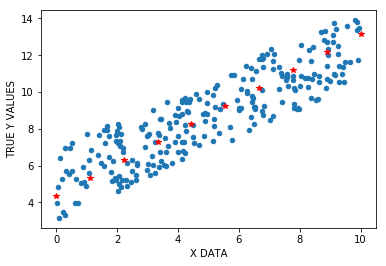

In [282]:
my_data_2.sample(250).plot(x = 'X DATA', y = 'TRUE Y VALUES', kind = 'scatter')
plt.plot(_data_A, predictions_A, 'r*')